In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    f1_score,
    classification_report,
    confusion_matrix,
    roc_auc_score,
)

In [157]:
df = pd.read_csv("../our_analyses/dataset_prepared.csv")

In [158]:
from sklearn.preprocessing import LabelEncoder

df=df.drop(['name', 'artists', 'album_name'], axis=1)

# genre_groups = {
#     'j-dance': 0, 'techno': 0, 'mandopop': 0, 'idm': 0, 'chicago-house': 0, 'breakbeat': 0,  # Elettronica/Dance
#     'black-metal': 1,  # Metal/Rock
#     'bluegrass': 2,  # Country/Folk
#     'j-idol': 3, 'spanish': 3, 'disney': 3, 'brazil': 3,  # Pop/Commerciale
#     'iranian': 4, 'afrobeat': 4, 'indian': 4, 'forro': 4,  # World
#     'happy': 5, 'sleep': 5, 'study': 5,  # Ambient/New Age
#     'industrial': 6  # Other
# }
genre_groups = {
    'j-dance': 0, 'techno': 0, 'chicago-house': 0, 'breakbeat': 0, 
        'happy': 1, 'sleep': 1, 'study': 1, 'disney': 1, 
        'bluegrass': 2, 'forro': 2, 'mandopop': 2, 'iranian': 2, 'indian': 2, 'brazil': 2, 
        'black-metal': 3, 'industrial': 3, 
        'j-idol': 4, 'spanish': 4, 'afrobeat': 4, 
        'idm': 5
}
genre_labels = ['Metal and Related', 'Metal/Rock', 'Country/Folk', 'Pop/Commercial', 'World', 'Ambient/New Age', 'Other', 'Indian']


# Mappatura dei generi del dataframe ai gruppi di generi
df['genre_group'] = df['genre'].map(genre_groups).astype(int)

# Stampa del mapping dei generi ai numeri corrispondenti
print(df['genre_group'].unique())

le = LabelEncoder()
df['explicit'] = le.fit_transform(df['explicit'])

drop_attributes=['genre', 'explicit', 'mode', 'time_signature']
df = df.drop(drop_attributes, axis=1)

[4 3 2 0 1 5]


In [159]:
df.head()

,duration_ms,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre_group
0,293106,50,0.401,0.683,8,-5.722,0.0401,0.181,0.000000,0.0837,0.226,135.951,4
1,194972,52,0.672,0.858,3,-5.233,0.1450,0.456,0.811000,0.1040,0.963,166.689,4
2,178428,22,0.636,0.826,3,-7.486,0.0585,0.461,0.271000,0.1410,0.731,102.809,4
3,238373,20,0.733,0.862,7,-5.813,0.0604,0.287,0.000532,0.4660,0.745,107.981,4
4,221893,22,0.712,0.225,5,-10.017,0.0533,0.930,0.001000,0.1230,0.429,87.520,4


In [160]:
from sklearn.model_selection import train_test_split

attributes = [col for col in df.columns if col != 'genre_group']
X = df[attributes].values
y = df['genre_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y) # we use 70% and 30% and we stratisfy to have the same distribution for the classes between them in the training and in the test set

In [162]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
norm.fit(X_train)

X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [163]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [164]:
dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [165]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [166]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1.]

Test Accuracy 0.5662222222222222
Test F1-score [0.56497797 0.60090703 0.67885881 0.54109589 0.39669421 0.31732777]


In [167]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.56      0.57      0.56       900
           1       0.61      0.59      0.60       900
           2       0.67      0.69      0.68      1350
           3       0.56      0.53      0.54       450
           4       0.40      0.39      0.40       675
           5       0.30      0.34      0.32       225

    accuracy                           0.57      4500
   macro avg       0.52      0.52      0.52      4500
weighted avg       0.57      0.57      0.57      4500



In [168]:
import plotly.figure_factory as ff
from sklearn.metrics import confusion_matrix

# Assumiamo che 'y_test' e 'y_test_pred' siano già definiti e contengano le etichette vere e predette dal tuo modello

# Genera la matrice di confusione
cf = confusion_matrix(y_test, y_test_pred)

# Definisci le etichette per i generi in base ai raggruppamenti definiti
genre_labels = ['Dance/Electronic', 'Ambient/Relaxing', 'Global/Traditional', 'Metal/Industrial', 'Pop/World', 'Experimental/Electronic']

# Crea la heatmap usando plotly
fig = ff.create_annotated_heatmap(z=cf, x=genre_labels, y=genre_labels,
                                  annotation_text=cf.astype(str), colorscale='Greens')

# Aggiorna il layout
fig.update_layout(title_text='Confusion Matrix', title_x=0.5,
                  xaxis=dict(title='Predicted Labels', tickangle=45),
                  yaxis=dict(title='True Labels', tickmode='array', tickvals=list(range(len(genre_labels))), ticktext=genre_labels),
                  yaxis_autorange='reversed')  # Reverse the y-axis to have the first class at the top

# Mostra il grafico
fig.show()


In [169]:
zipped = zip(attributes, dt.feature_importances_)
zipped = sorted(zipped, key=lambda x: x[1], reverse=True)
for col, imp in zipped:
    print(col, imp)

acousticness 0.14027782486399587
popularity 0.1245428462068714
duration_ms 0.11795385418371158
danceability 0.11336447800414028
instrumentalness 0.10189008125797781
valence 0.07374717933092177
speechiness 0.07324994790549846
loudness 0.06630171316562657
energy 0.05921755474345909
tempo 0.05711327551968169
liveness 0.047175979228987135
key 0.025165265589128186


#### Decision Tree hyperparameters

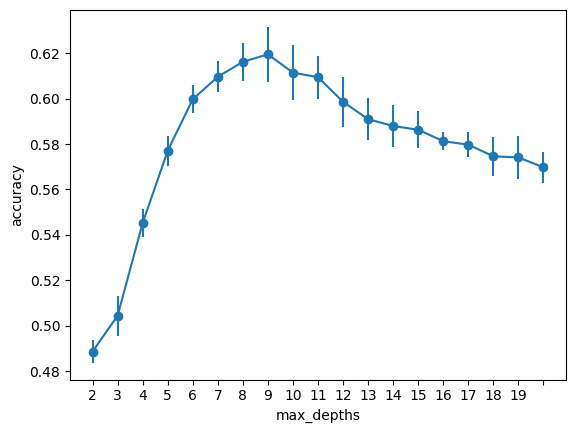

In [170]:
from sklearn.model_selection import cross_val_score

max_depths =  list(np.arange(2, 20)) + [None]
avg_scores = list()
std_scores = list()

for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(max_depths)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(max_depths)), max_depths)
plt.xlabel("max_depths")
plt.ylabel("accuracy")
plt.show()

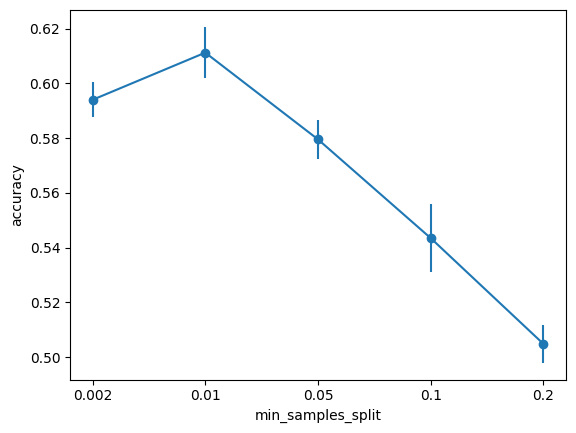

In [171]:
min_samples_splits = [0.002, 0.01, 0.05, 0.1, 0.2]
avg_scores = list()
std_scores = list()

for min_samples_split in min_samples_splits:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_splits)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_splits)), min_samples_splits)
plt.xlabel("min_samples_split") 
plt.ylabel("accuracy")
plt.show()

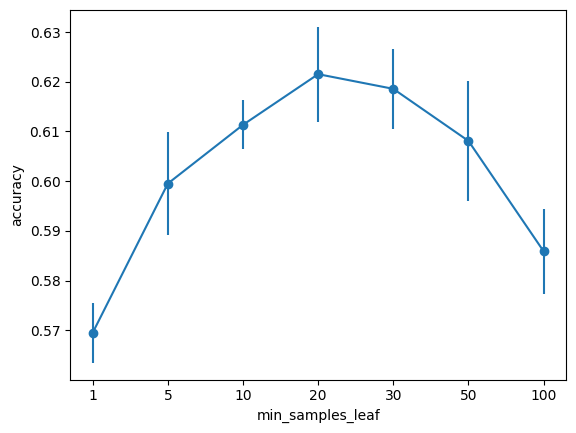

In [172]:
min_samples_leafs = [1, 5, 10, 20, 30, 50, 100]
avg_scores = list()
std_scores = list()

for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(dt, X_train, y_train, cv=5)
    avg_scores.append(np.mean(scores))
    std_scores.append(np.std(scores))

plt.errorbar(range(len(min_samples_leafs)), y=avg_scores, yerr=std_scores, marker='o')
plt.xticks(range(len(min_samples_leafs)), min_samples_leafs)
plt.xlabel("min_samples_leaf")
plt.ylabel("accuracy")
plt.show()

### Randomized search

In [173]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [174]:
# param_list = {
#     'max_depth': [None] + list(np.arange(2, 20)),
#     'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
#     'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
#     'criterion': ['gini', 'entropy']
# }

# clf = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1)

# random_search = RandomizedSearchCV(
#     DecisionTreeClassifier(),
#     param_distributions=param_list,
#     cv=RepeatedStratifiedKFold(random_state=0),
#     n_jobs=-1,
#     refit=True,
#     n_iter=200,
#     #verbose=2
# )

# random_search.fit(X_train, y_train)
# clf = random_search.best_estimator_

In [175]:
# print(random_search.best_params_, random_search.best_score_)

Test Accuracy: 0.6222222222222222
Test F1 Score: 0.6139395571697225


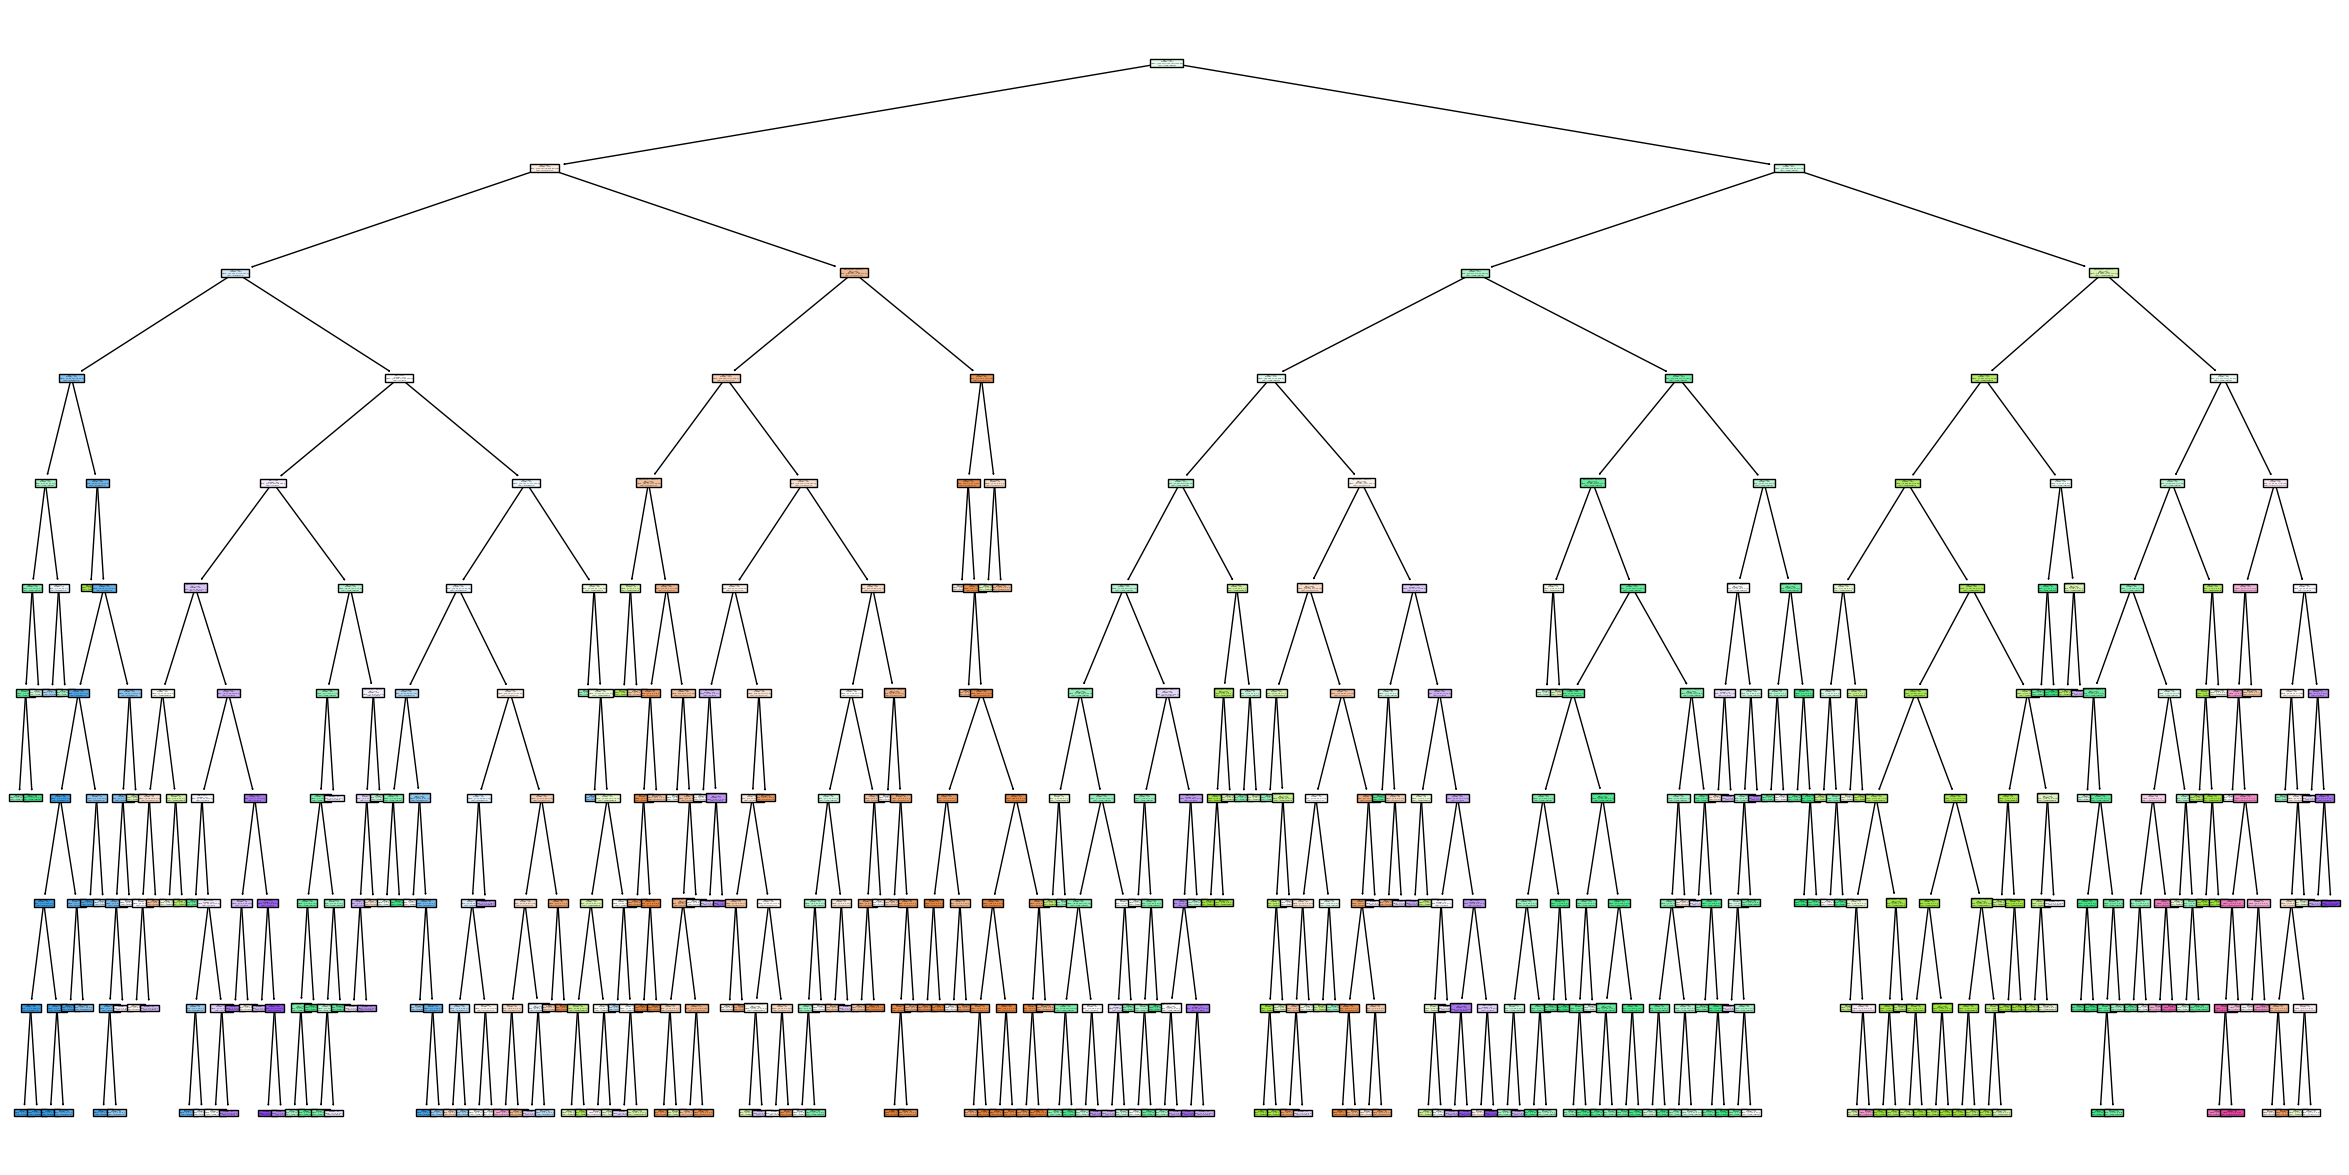

In [176]:
from sklearn.tree import DecisionTreeClassifier

# I tuoi iperparametri ottimizzati
best_params = {
    'criterion': 'gini',
    'max_depth': 10,
    'min_samples_leaf': 20,
    'min_samples_split': 10
}

# Istanzia il modello con i migliori iperparametri
dt_optimized = DecisionTreeClassifier(**best_params)

# Addestra il modello
dt_optimized.fit(X_train, y_train)

# Effettua previsioni sul set di test
y_test_pred = dt_optimized.predict(X_test)

# Valuta il modello
test_accuracy = accuracy_score(y_test, y_test_pred)
test_f1_score = f1_score(y_test, y_test_pred, average='weighted') # 'weighted' tiene conto del bilanciamento delle classi

print(f'Test Accuracy: {test_accuracy}')
print(f'Test F1 Score: {test_f1_score}')

# Se desideri visualizzare l'albero decisionale
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,15))
plot_tree(dt_optimized, feature_names=attributes, class_names=genre_labels, filled=True)
plt.show()


In [177]:
import plotly.graph_objs as go
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Assicurati che Z_train, Z_test, t_train, e t_test siano definiti e che i tuoi dati siano già preelaborati
# Z_train, Z_test, t_train, t_test = ...

# Previsione delle probabilità per il set di test
y_score = dt_optimized.predict_proba(X_test_norm)

# Binarizza il vettore delle etichette in un formato "one-vs-all"
y_test_binarize = label_binarize(y_test, classes=np.unique(y_train))

# Calcola ROC curve e AUC per ciascuna classe
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_score.shape[1]

# Preparare i dati per il plot
traces = []

# Calcola la ROC curve per ogni classe
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarize[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    traces.append(go.Scatter(x=fpr[i], y=tpr[i], mode='lines', 
                             name=f'Class {i} (AUC = {roc_auc[i]:.2f})'))

# Aggiungi la linea diagonale che rappresenta il caso di "indovinare casualmente"
traces.append(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Chance', 
                         line=dict(dash='dash')))

# Crea il layout del plot
layout = go.Layout(title='Multiclass ROC Curve',
                   xaxis=dict(title='False Positive Rate'),
                   yaxis=dict(title='True Positive Rate'),
                   width=1000,
                   height=800,
                   showlegend=True,
                   legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1))

fig = go.Figure(data=traces, layout=layout)
fig.show()


In [178]:
print('Train Accuracy %s' % accuracy_score(y_train, y_train_pred))
print('Train F1-score %s' % f1_score(y_train, y_train_pred, average=None))
print()

print('Test Accuracy %s' % accuracy_score(y_test, y_test_pred))
print('Test F1-score %s' % f1_score(y_test, y_test_pred, average=None))

Train Accuracy 1.0
Train F1-score [1. 1. 1. 1. 1. 1.]

Test Accuracy 0.6222222222222222
Test F1-score [0.63347921 0.64554888 0.72764787 0.61689106 0.41347626 0.32258065]
